
# Ensemble Methods and Skewed Data


  - AdaBoost, and
  - Random Forests
  


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve

# This is the credit card data provided, we'll use sklearn methods to do cross validation
# to estimate error
df_cc = pd.read_csv('cc.csv')

## cross validation


In [2]:
df_X = df_cc.drop(columns=['Class'])
s_y = df_cc['Class']

In [3]:
skf = StratifiedKFold(n_splits=3,shuffle=True,random_state=23)

In [4]:
d_train_df_X = dict()
d_test_df_X = dict()
d_train_s_y = dict()
d_test_s_y = dict()

# Your code here
count = 0
for train_index, test_index in skf.split(df_X, s_y):
    d_train_df_X[count], d_test_df_X[count] = df_X.loc[train_index], df_X.loc[test_index]
    d_train_s_y[count], d_test_s_y[count] = s_y[train_index], s_y[test_index]
    count += 1

In [5]:
# Look at the test data and verify that the target training is equally distributed as possible
for key in d_test_s_y.keys():
    print(d_test_s_y[key].value_counts())

0    47389
1       79
Name: Class, dtype: int64
0    47389
1       79
Name: Class, dtype: int64
0    47389
1       79
Name: Class, dtype: int64


## Section 1 - AdaBoost

# Test the Performance of AdaBoost



In [5]:
k = 3
acc_ab = np.zeros(k)
tpr_ab = np.zeros(k)
ppv_ab = np.zeros(k)
fpr_ab = np.zeros(k)

ROC Fold3
49 11 47378 30
ROC Fold3
49 16 47373 30
ROC Fold3
56 14 47375 23


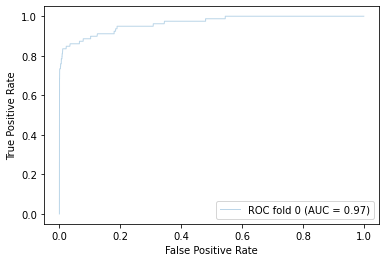

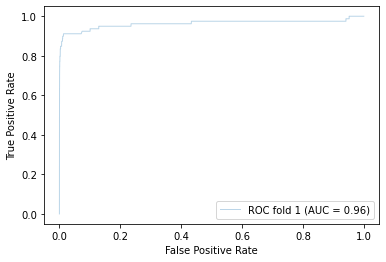

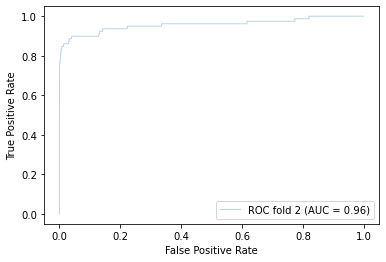

In [6]:
# your code here
abc = AdaBoostClassifier(n_estimators=25, random_state=23)

for i in range(k):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    print('ROC Fold'+ str(k))
    abc.fit(d_train_df_X[i], d_train_s_y[i])
    plot = plot_roc_curve(abc, d_test_df_X[i], d_test_s_y[i], name='ROC fold {}'.format(i), alpha = 0.3, lw = 1)
    test_X, test_Y = d_test_df_X[i], d_test_s_y[i]
    test_Y = test_Y.tolist()
    predicted = abc.predict(test_X)
    
    for j in range(len(test_Y)):
        if test_Y[j] == predicted[j] and test_Y[j] == 1:
            TP += 1
        elif predicted[j] == 1 and test_Y[j] != predicted[j]:
            FP += 1
        elif test_Y[j] == 0 and predicted[j] == 0:
            TN += 1
        elif test_Y[j] != predicted[j] and predicted[j] == 0:
            FN += 1
    
    print(TP, FP, TN, FN)
    TPR = TP/(TP + FN)
    PPV = TP/(TP+FP)
    FPR = FP/(FP+TN)
    
    tpr_ab[i] = TPR
    ppv_ab[i] = PPV
    fpr_ab[i] = FPR
    acc_ab[i] = abc.score(d_test_df_X[i], d_test_s_y[i])
    
    if i == 2:
        y_hat_ab = abc.predict(d_test_df_X[i])
        


In [8]:
print('The min, mean, and max TPR are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_ab.min(), tpr_ab.mean(), tpr_ab.max()))
print('The min, mean, and max PPV are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_ab.min(), ppv_ab.mean(), ppv_ab.max()))
print('The min, mean, and max ACC are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_ab.min(), acc_ab.mean(), acc_ab.max()))

The min, mean, and max TPR are: 0.62, 0.65, and 0.71
The min, mean, and max PPV are: 0.75, 0.79, and 0.82
The min, mean, and max ACC are: 1.00, 1.00, and 1.00


## Test the Performance of Random Forests

In [7]:
k = 3
acc_rf = np.zeros(k)
tpr_rf = np.zeros(k)
ppv_rf = np.zeros(k)
fpr_rf = np.zeros(k)

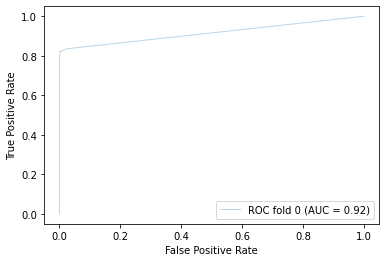

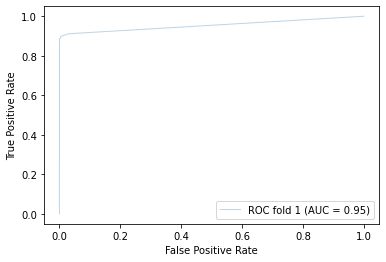

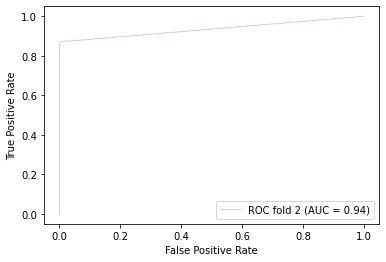

In [8]:
# your code here
rf = RandomForestClassifier(criterion="entropy", max_features="sqrt", random_state=23)
for x in range(k):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    rf.fit(d_train_df_X[x], d_train_s_y[x])
    plot = plot_roc_curve(rf, d_test_df_X[x], d_test_s_y[x], name='ROC fold {}'.format(x), alpha = 0.3, lw = 1)
    test_X = d_test_df_X[x]
    test_Y = d_test_s_y[x]
    test_Y = test_Y.tolist()
    predicted = rf.predict(test_X)
    
    for i in range(len(d_test_s_y[x])):
        if test_Y[i] == predicted[i] and test_Y[i] == 1:
            TP += 1
        elif predicted[i] == 1 and test_Y[i] != predicted[i]:
            FP += 1
        elif test_Y[i] == 0 and predicted[i] == 0:
            TN += 1
        elif test_Y[i] != predicted[i] and predicted[i] == 0:
            FN += 1
    
    tpr_rf[x] = TP/(TP + FN)
    ppv_rf[x] = TP/(TP+FP)
    fpr_rf[x] = FP/(FP+TN)
    acc_rf[x] = rf.score(d_test_df_X[x], d_test_s_y[x])
    
    if x == 2:
        y_hat_rf = rf.predict(d_test_df_X[x])

In [9]:
print('The min, mean, and max TPR are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_rf.min(), tpr_rf.mean(), tpr_rf.max()))
print('The min, mean, and max PPV are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_rf.min(), ppv_rf.mean(), ppv_rf.max()))
print('The min, mean, and max ACC are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_rf.min(), acc_rf.mean(), acc_rf.max()))

The min, mean, and max TPR are: 0.75, 0.78, and 0.80
The min, mean, and max PPV are: 0.92, 0.93, and 0.95
The min, mean, and max ACC are: 1.00, 1.00, and 1.00


# Calculate the Cost of Fraud 



In [10]:
loss = 0
df = df_cc[['Class', 'Amount']]
x = 0
for train, test in skf.split(df_X, s_y):
    if  x == 2:
        cost_real = test
    x += 1
for c in cost_real:
    if df['Class'][c] == 1:
        loss = loss + 2* df['Amount'][c]
print('Current loss: ')
print('$'+str(round(loss,2)))
print('Adaboost Loss:')
testing = d_test_s_y[2]
testing = dict(testing)
#print(testing)
ada_loss = 0
rf_loss = 0
row =0
for k, v in (testing.items()):
    ada = y_hat_ab[row]
    rf = y_hat_rf[row]
    if v != ada:
        if ada == 0:
            ada_loss += 2 * df['Amount'][k]
        else:
            ada_loss += 3
    if v != rf:
        if rf == 0:
            rf_loss += 2 * df['Amount'][k]
        else:
            rf_loss += 3
    row += 1
print('$'+str(round(ada_loss,2)))
print('Money Saved:')
print('$'+str(round(loss-ada_loss,2)))
print('Random Forests Loss:')
print('$'+str(round(rf_loss,2)))
print('Money Saved:')
print('$'+str(round(loss-rf_loss,2)))

Current loss: 
$22484.74
Adaboost Loss:
$8538.32
Money Saved:
$13946.42
Random Forests Loss:
$4363.38
Money Saved:
$18121.36


In [11]:
print('Mr Bank man will save money if we deploy the Adaboost algorithm!')
print('Mr Bank man will also save money if we deploy the Random Forests algorithm!')
print('However, he will save more money with Random Forests')

Mr Bank man will save money if we deploy the Adaboost algorithm!
Mr Bank man will also save money if we deploy the Random Forests algorithm!
However, he will save more money with Random Forests
